# alrighty, lets check for relationships


import libraries again



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
sns.set_style("whitegrid")

In [12]:
london1 = pd.read_csv('london1.csv')

london1.head()

,Borough,Population,longitude,latitude,Total_Crime,Crime_Rate,Arts,Outdoors,Study,Social and Religious,Total_Venues
0,Barking and Dagenham,212906,0.129506,51.5455,39456,18532.12,65,97,76,75,313
1,Barnet,395896,-0.218210,51.6111,59167,14945.09,66,120,71,72,329
2,Bexley,248287,0.146212,51.4582,33929,13665.23,61,84,61,72,278
3,Brent,329771,-0.275680,51.5644,59257,17969.14,76,110,97,82,365
4,Bromley,332336,0.039246,51.3727,47499,14292.46,54,58,50,57,219


In [13]:
# let's make them all per 100,000 people like the crime rate
london1['Arts'] = round((london1['Arts']/london1['Population']) * 100000, 2)
london1['Outdoors'] = round((london1['Outdoors']/london1['Population']) * 100000, 2)
london1['Study'] = round((london1['Study']/london1['Population']) * 100000, 2)
london1['Social and Religious'] = round((london1['Social and Religious']/london1['Population']) * 100000, 2)
london1['Total_Venues'] = round((london1['Total_Venues']/london1['Population']) * 100000, 2)
london1.head()

,Borough,Population,longitude,latitude,Total_Crime,Crime_Rate,Arts,Outdoors,Study,Social and Religious,Total_Venues
0,Barking and Dagenham,212906,0.129506,51.5455,39456,18532.12,30.53,45.56,35.70,35.23,147.01
1,Barnet,395896,-0.218210,51.6111,59167,14945.09,16.67,30.31,17.93,18.19,83.10
2,Bexley,248287,0.146212,51.4582,33929,13665.23,24.57,33.83,24.57,29.00,111.97
3,Brent,329771,-0.275680,51.5644,59257,17969.14,23.05,33.36,29.41,24.87,110.68
4,Bromley,332336,0.039246,51.3727,47499,14292.46,16.25,17.45,15.05,17.15,65.90


I want to see if there is a correlation between crime rate and:
- total number of venues
- number of arts venues
- number of outdoor recreation venues
- number of colleges and libraries
- number of social and religious venues

In [14]:
# use pandas .corr() to have a quick look
london1.corr()

,Population,longitude,latitude,Total_Crime,Crime_Rate,Arts,Outdoors,Study,Social and Religious,Total_Venues
Population,1.000000,0.101452,0.205335,0.462454,-0.083029,-0.524894,-0.621883,-0.567293,-0.599480,-0.594798
longitude,0.101452,1.000000,0.058903,0.023742,-0.036664,-0.154283,-0.276308,-0.148976,-0.147591,-0.188064
latitude,0.205335,0.058903,1.000000,0.221116,0.150148,-0.091984,-0.178964,-0.068430,-0.052939,-0.102990
Total_Crime,0.462454,0.023742,0.221116,1.000000,0.836521,0.266649,0.070793,0.215134,0.226909,0.203506
Crime_Rate,-0.083029,-0.036664,0.150148,0.836521,1.000000,0.646931,0.466871,0.629472,0.650852,0.619234
Arts,-0.524894,-0.154283,-0.091984,0.266649,0.646931,1.000000,0.935325,0.930093,0.949523,0.988616
Outdoors,-0.621883,-0.276308,-0.178964,0.070793,0.466871,0.935325,1.000000,0.850952,0.866680,0.947168
Study,-0.567293,-0.148976,-0.068430,0.215134,0.629472,0.930093,0.850952,1.000000,0.929749,0.960823
Social and Religious,-0.599480,-0.147591,-0.052939,0.226909,0.650852,0.949523,0.866680,0.929749,1.000000,0.966202
Total_Venues,-0.594798,-0.188064,-0.102990,0.203506,0.619234,0.988616,0.947168,0.960823,0.966202,1.000000


From this it looks like there may be a positive correlation with numbers of venues and crime rates, which is not what we expected at all!

Let's plot them and see.

Text(0.5, 1.0, 'Total Venues Vs Crime Rate')

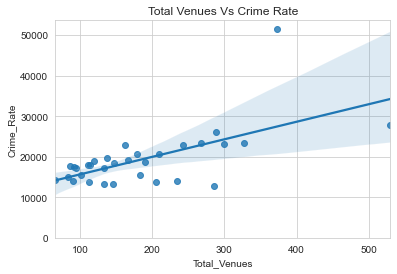

In [15]:
sns.regplot(x="Total_Venues", y="Crime_Rate", data=london1)
plt.ylim(0,)
plt.title('Total Venues Vs Crime Rate')

Text(0.5, 1.0, 'Art Venues Vs Crime Rate')

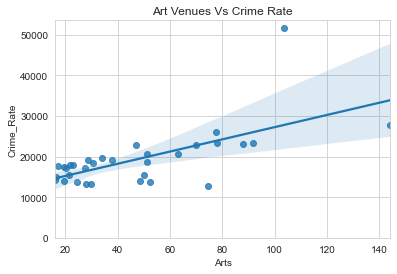

In [16]:
sns.regplot(x="Arts", y="Crime_Rate", data=london1)
plt.ylim(0,)
plt.title('Art Venues Vs Crime Rate')


Text(0.5, 1.0, 'Outdoor Recreation Venues Vs Crime Rate')

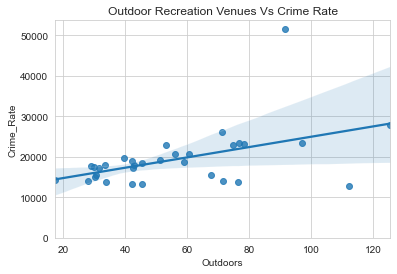

In [17]:
sns.regplot(x="Outdoors", y="Crime_Rate", data=london1)
plt.ylim(0,)
plt.title('Outdoor Recreation Venues Vs Crime Rate')

Text(0.5, 1.0, 'Study Venues Vs Crime Rate')

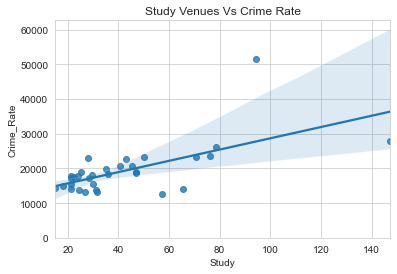

In [18]:
sns.regplot(x="Study", y="Crime_Rate", data=london1)
plt.ylim(0,)
plt.title('Study Venues Vs Crime Rate')

Text(0.5, 1.0, 'Social and Religious Venues Vs Crime Rate')

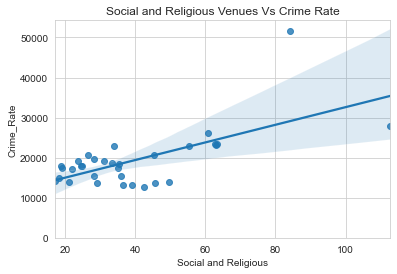

In [19]:
sns.regplot(x="Social and Religious", y="Crime_Rate", data=london1)
plt.ylim(0,)
plt.title('Social and Religious Venues Vs Crime Rate')


Those all look like slight positive correlations, but I will do a Pearson Correlation to check if they are statistically significant.

The null hypothesis is that there is no correlation between the number of total venues, or the number of each type of venues, and crime rate.

The closer to 1 or -1 the correlation coefficient is, the larger the correlation is.

I have chosen a p value of 0.05, so p must be below that for the result to be statistically significant.

In [20]:
def calc_pearson(var):
    pearson_coef, p_value = scipy.stats.pearsonr(london1[var], london1['Crime_Rate'])
    print(f'The correlation coefficient for {var} with crime rate is {round(pearson_coef, 3)}, with a p-value of {round(p_value, 3)}')
    if p_value < 0.05:
        print('The correlation is statistically significant.')
    else:
        print('The correlation is not statistically significant.')

cols = ['Arts', 'Outdoors', 'Study', 'Social and Religious', 'Total_Venues']
for col in cols:
    calc_pearson(col)

The correlation coefficient for Arts with crime rate is 0.647, with a p-value of 0.0
The correlation is statistically significant.
The correlation coefficient for Outdoors with crime rate is 0.467, with a p-value of 0.007
The correlation is statistically significant.
The correlation coefficient for Study with crime rate is 0.629, with a p-value of 0.0
The correlation is statistically significant.
The correlation coefficient for Social and Religious with crime rate is 0.651, with a p-value of 0.0
The correlation is statistically significant.
The correlation coefficient for Total_Venues with crime rate is 0.619, with a p-value of 0.0
The correlation is statistically significant.


From these results, we **reject the null hypothesis**.

**There is a correlation between numbers of venues, and numbers of types of venues and crime rate.**

This correlation is **positive**, the more of each venue type, the higher the crime rate.

For all venue types, except outdoor recreation, the correlation coefficient is approximately 0.6.

For outdoor recreation, the correlation coefficient is lower at only approximately 0.5.

However, correlation is not causation!

### Clustering

Another way to attempt to answer this question is to use machine learning to divide the London Boroughs into clusters based on which venues are present.

I will use K-means clustering to do this, and see if there is a correlation between the clusters and crime rate. I will then see if there is anything the make-up of venues in each cluster can tell us.

In [ ]:
from sklearn.cluster import KMeans

all_venues = pd.read_csv('all_venues.csv')

# lets see how k-means clustering sorts them and if that correlates
# one hot encoding
london_onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Borough'] = all_venues['Borough']

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()


In [10]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

,Borough,Population,longitude,latitude,Total_Crime,Crime_Rate,Crime_Rate_binned,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,212906,0.129506,51.5455,39456,18532.12,Medium,2,Church,Park,Community Center,Library,Art Gallery,College Academic Building,General College & University,Historic Site,College Classroom,University
1,Barnet,395896,-0.218210,51.6111,59167,14945.09,Low,1,Church,Park,Library,University,History Museum,College Academic Building,Historic Site,College Residence Hall,General College & University,Pub
2,Bexley,248287,0.146212,51.4582,33929,13665.23,Low,2,Church,Park,Library,Historic Site,College Academic Building,Community Center,College Classroom,Gym / Fitness Center,Social Club,University
3,Brent,329771,-0.275680,51.5644,59257,17969.14,Medium,1,Church,Park,Library,University,Art Gallery,College Academic Building,Historic Site,Soccer Stadium,Bridge,Social Club
4,Bromley,332336,0.039246,51.3727,47499,14292.46,Low,3,Church,Park,Library,Community College,Gym / Fitness Center,College Academic Building,Historic Site,Art Gallery,General Entertainment,General College & University


In [ ]:
# top 10 categories per borough

# function to find the top venues for each neighbourhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Boroughs_venues_sorted = pd.DataFrame(columns=columns)
Boroughs_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    Boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

Boroughs_venues_sorted.head()

In [ ]:
# set number of clusters
kclusters = 4

toronto_grouped_clustering = london_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

In [ ]:
# add clustering labels
Boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london2= london_crimes.copy()

# merge toronto_grouped with toronto_data to add latitude/longitude for each Borough
london2 = london2.join(Boroughs_venues_sorted.set_index('Borough'), on='Borough')

london2.head()

first, lets look at the clusters

the 1st 2 most common venues for ALL london boroughs are:
Church
Park

### Cluster 1
3rd is University, 4th is Library
Then there are a lot of museums and historic sites
I will call cluster 1

### Historic London

In [11]:
london2.loc[london2['Cluster Labels'] == 0, london2.columns[[0] + list(range(8, london2.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Camden,Church,Park,University,Library,Historic Site,Art Museum,History Museum,Social Club,Plaza,College Academic Building
10,Hackney,Church,Park,University,Library,Social Club,Art Museum,Plaza,History Museum,College Academic Building,Historic Site
11,Hammersmith and Fulham,Church,Park,University,Library,Art Museum,College Academic Building,Plaza,Historic Site,Social Club,History Museum
12,Haringey,Church,Park,University,Library,College Academic Building,Plaza,History Museum,Art Museum,Palace,Social Club
17,Islington,Church,Park,University,Library,Social Club,Art Museum,General College & University,History Museum,Plaza,College Academic Building
18,Kensington and Chelsea,Church,Park,University,Library,Art Museum,Historic Site,History Museum,Social Club,College Academic Building,Plaza
20,Lambeth,Church,Park,University,Library,Social Club,Art Museum,Historic Site,College Academic Building,History Museum,Theater
21,Lewisham,Church,Park,University,Library,Plaza,Theater,Community Center,Historic Site,Social Club,Bridge
23,Newham,Church,Park,University,Library,Plaza,Theater,Bridge,History Museum,Social Club,Community Center
26,Southwark,Church,Park,University,Library,Social Club,Art Museum,Historic Site,Plaza,College Academic Building,History Museum


### Cluster 2
Seems to be slightly less scholarly than cluster 1. Has colleges and universities, and libraries. Fewer museums.
I will call cluster 2
### Student London

In [12]:
london2.loc[london2['Cluster Labels'] == 1, london2.columns[[0] + list(range(8, london2.shape[1]))]]


,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,Church,Park,Library,University,History Museum,College Academic Building,Historic Site,College Residence Hall,General College & University,Pub
3,Brent,Church,Park,Library,University,Art Gallery,College Academic Building,Historic Site,Soccer Stadium,Bridge,Social Club
7,Ealing,Church,Park,College Academic Building,Library,Historic Site,Art Gallery,General College & University,Bridge,Soccer Stadium,Outdoor Sculpture
15,Hillingdon,Church,Park,Library,College Academic Building,Gym / Fitness Center,College Library,University,General College & University,College Residence Hall,Mosque
16,Hounslow,Church,Park,Historic Site,Library,College Academic Building,University,General College & University,General Entertainment,Bridge,Outdoor Sculpture
19,Kingston upon Thames,Church,Park,Library,College Academic Building,Historic Site,University,Bridge,General College & University,Outdoor Sculpture,Soccer Stadium
22,Merton,Church,Park,Library,Plaza,College Academic Building,University,Theater,Art Museum,Historic Site,Bridge
25,Richmond upon Thames,Church,Park,College Academic Building,Library,Historic Site,Art Gallery,Bridge,University,College Classroom,General College & University


### Cluster 3
This one has fewer colleges and more art galleries and music venues.
I will call cluster 3
### Arty London

In [13]:
london2.loc[london2['Cluster Labels'] == 2, london2.columns[[0] + list(range(8, london2.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Church,Park,Community Center,Library,Art Gallery,College Academic Building,General College & University,Historic Site,College Classroom,University
2,Bexley,Church,Park,Library,Historic Site,College Academic Building,Community Center,College Classroom,Gym / Fitness Center,Social Club,University
8,Enfield,Church,Park,Library,General College & University,College Academic Building,Community Center,Art Gallery,Pub,History Museum,Cricket Ground
9,Greenwich,Church,Park,Library,University,College Academic Building,Art Gallery,Historic Site,Community Center,General College & University,Social Club
13,Harrow,Church,Park,Library,College Academic Building,Movie Theater,Music Venue,General College & University,University,Historic Site,Community Center
14,Havering,Church,Park,Library,College Academic Building,Social Club,College Classroom,Community Center,Music Venue,General Entertainment,General College & University
24,Redbridge,Church,Park,Library,Community Center,Art Gallery,College Academic Building,General College & University,Pub,Gym / Fitness Center,Social Club
29,Waltham Forest,Church,Park,Library,Art Gallery,University,History Museum,Social Club,General College & University,Historic Site,College Residence Hall


### Cluster 4
The smallest cluster, with several general entertainment venues, so i will call it
### Entertainment London

In [14]:
london2.loc[london2['Cluster Labels'] == 3, london2.columns[[0] + list(range(8, london2.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bromley,Church,Park,Library,Community College,Gym / Fitness Center,College Academic Building,Historic Site,Art Gallery,General Entertainment,General College & University
6,Croydon,Church,Park,Library,Community College,Historic Site,Student Center,Art Gallery,General Entertainment,Pub,College Academic Building
27,Sutton,Church,Park,Library,College Academic Building,Performing Arts Venue,Historic Site,General College & University,General Entertainment,University,Movie Theater


In [15]:
labels = {0: "Historic London", 1: "Student London", 2: "Arty London", 3: 'Entertainment London'}

london2['Cluster Names'] = london2['Cluster Labels'].map(labels)
london2.head()

,Borough,Population,longitude,latitude,Total_Crime,Crime_Rate,Crime_Rate_binned,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Names
0,Barking and Dagenham,212906,0.129506,51.5455,39456,18532.12,Medium,2,Church,Park,Community Center,Library,Art Gallery,College Academic Building,General College & University,Historic Site,College Classroom,University,Arty London
1,Barnet,395896,-0.218210,51.6111,59167,14945.09,Low,1,Church,Park,Library,University,History Museum,College Academic Building,Historic Site,College Residence Hall,General College & University,Pub,Student London
2,Bexley,248287,0.146212,51.4582,33929,13665.23,Low,2,Church,Park,Library,Historic Site,College Academic Building,Community Center,College Classroom,Gym / Fitness Center,Social Club,University,Arty London
3,Brent,329771,-0.275680,51.5644,59257,17969.14,Medium,1,Church,Park,Library,University,Art Gallery,College Academic Building,Historic Site,Soccer Stadium,Bridge,Social Club,Student London
4,Bromley,332336,0.039246,51.3727,47499,14292.46,Low,3,Church,Park,Library,Community College,Gym / Fitness Center,College Academic Building,Historic Site,Art Gallery,General Entertainment,General College & University,Entertainment London


This time I will map the crime rates in London and overlay the clusters, to see if there is a pattern

## insert maps here

It looks like there is a correlation between the London categories and crime rates.

As I am now comparing a categorical variable with a numerical variable, I will use an ANOVA test to check for correlations instead of a Pearson test.

The null hypothesis is that there is no difference in mean crime rates between London categories.

In [18]:
grouped_df = london2.groupby('Cluster Names')
f_val, p_val = scipy.stats.f_oneway(grouped_df.get_group('Historic London')['Crime_Rate'], grouped_df.get_group('Student London')['Crime_Rate'], grouped_df.get_group('Arty London')['Crime_Rate'], grouped_df.get_group('Entertainment London')['Crime_Rate'])

print( "ANOVA results: F=", f_val, ", P =", p_val)
if p_val < 0.05:
    print("This result is statistically significant")
else:
    print("This result is not statistically significant")

ANOVA results: F= 5.155458628218038 , P = 0.005791518594742238
This result is statistically significant


From this, we can reject the null hypothesis.
There IS a difference in the mean crime rates, depending on which London category the areas are in.

But let's try and narrow it down a bit more.

From the map, there is a very clear correlation between Historic (central) London and a higher crime rate.

Is there still a correlation if I take that out?


In [19]:
f_val, p_val = scipy.stats.f_oneway(grouped_df.get_group('Student London')['Crime_Rate'], grouped_df.get_group('Arty London')['Crime_Rate'], grouped_df.get_group('Entertainment London')['Crime_Rate'])

print( "ANOVA results: F=", f_val, ", P =", p_val)
if p_val < 0.05:
    print("This result is statistically significant")
else:
    print("This result is not statistically significant")

ANOVA results: F= 0.290521918152654 , P = 0.7517352604075168
This result is not statistically significant


For the rest of London, we accept the null hypothesis.
There is NO difference between the mean crime rates depending on which London category an area is in.
